<h1>Real Estate Analysis in Saudi Arabia </h1>

<h2>Rent Price Analysis </h2>

*  Data Source: https://www.kaggle.com/datasets/lama122/saudi-arabia-real-estate-aqar
*  Data type: CSV

<h3>Questions to answer</h3>

*	What city has the highest prices in average?
*	Is the price effected by the city?
*	Is size correlated to price?
*	Is front direction correlated to price? 



importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = 'notebook'
import nbformat
#import kagglehub

Downloading the data

In [2]:
# Download latest version
#path = kagglehub.dataset_download("lama122/saudi-arabia-real-estate-aqar")

#print("Path to dataset files:", path)

In [ ]:
#load data
df = pd.read_csv(r"")


In [4]:
df.head(20)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...
5,الرياض,حي الازدهار,شرق,250,25,5,4,1,1,0,...,0,0,1,0,1,1,0,0,45000,الفيلا في حي الازدهار \nتتكون من مجلس رجال في ...
6,الرياض,حي المهدية,شمال,250,0,5,5,3,1,1,...,0,0,0,0,1,1,0,0,45000,دبلكس مساحه ٢٥٠\nحي المهديه\nدفع كل ٦ شهور
7,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
8,الرياض,حي الحزم,جنوب شرقي,288,6,5,5,1,1,0,...,0,0,1,0,1,1,0,0,37000,فيلا دبكلوكس علي شارعين قريب من الجامع والخدما...
9,الرياض,حي العليا,جنوب غربي,250,0,4,4,4,1,1,...,0,0,1,0,0,1,0,0,150000,New house for rent 150.000SR\nNew \n0500069102...


In [5]:
df.shape

(3718, 24)

In [6]:
df.columns

Index(['city', 'district', 'front', 'size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room',
       'maid_room', 'furnished', 'ac', 'roof', 'pool', 'frontyard', 'basement',
       'duplex', 'stairs', 'elevator', 'fireplace', 'price', 'details'],
      dtype='object')

In [7]:
# Drop columns
df = df.drop(['driver_room', 'maid_room', 'furnished', 'ac', 'roof', 'frontyard','basement', 'duplex','stairs','fireplace','details'], axis=1)

In [8]:
df.shape

(3718, 13)

In [9]:
print(df['city'].unique())
print(df['front'].unique())

[' الرياض' ' جدة' ' الدمام' ' الخبر']
['شمال' 'جنوب' 'غرب' 'شرق' 'جنوب شرقي' 'جنوب غربي' 'شمال غربي' 'شمال شرقي'
 '3 شوارع' '4 شوارع']


In [10]:
replacement_dict = {
    'الرياض': 'Riyadh',
    'الخبر': 'Khobar',
    'الدمام':'Dammam',
    'جدة':'Jeddah'
}
# Remove any leading or trailing spaces (if necessary)
df['city'] = df['city'].str.strip()
#replace
df['city'] = df['city'].replace(replacement_dict)



In [11]:
replacement_dict = {
    'شمال': 'North',
    'جنوب': 'South',
    'شرق':'East',
    'غرب':'West',
    'جنوب شرقي':'SE',
    'جنوب غربي':'SW',
    'شمال غربي':'NW',
    'شمال شرقي':'NE',
     '3 شوارع':'Street',
     '4 شوارع':'Street',

}
# Remove any leading or trailing spaces
df['front'] = df['front'].str.strip()
#replace
df['front'] = df['front'].replace(replacement_dict)

In [12]:
print(df['city'].unique())
print(df['front'].unique())

['Riyadh' 'Jeddah' 'Dammam' 'Khobar']
['North' 'South' 'West' 'East' 'SE' 'SW' 'NW' 'NE' 'Street']


In [13]:
df.head(5)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,pool,elevator,price
0,Riyadh,حي العارض,North,250,0,5,5,1,1,1,0,0,80000
1,Riyadh,حي القادسية,South,370,0,4,5,2,1,1,0,0,60000
2,Riyadh,حي القادسية,South,380,0,4,5,1,1,1,0,0,60000
3,Riyadh,حي المعيزلة,West,250,0,5,5,3,0,1,0,0,55000
4,Riyadh,حي العليا,West,400,11,7,5,2,1,1,0,0,70000


In [14]:
df.dtypes

city            object
district        object
front           object
size             int64
property_age     int64
bedrooms         int64
bathrooms        int64
livingrooms      int64
kitchen          int64
garage           int64
pool             int64
elevator         int64
price            int64
dtype: object

In [15]:
#get the null values
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

Empty DataFrame
Columns: [city, district, front, size, property_age, bedrooms, bathrooms, livingrooms, kitchen, garage, pool, elevator, price]
Index: []


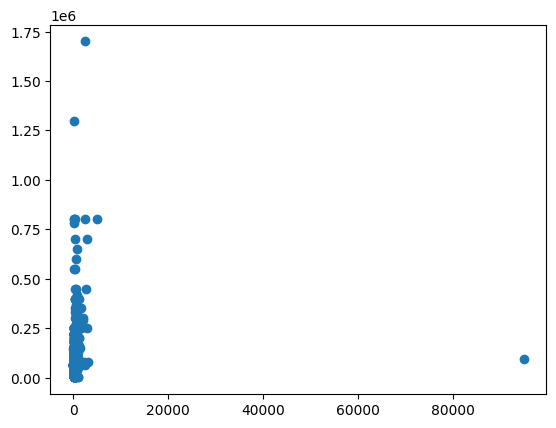

In [16]:
plt.scatter(df['size'],df['price'])

<h1>Drop outliers<h1/>

In [17]:
# using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [18]:
targeted_columns = ['price', 'size', 'bedrooms', 'bathrooms']
df = remove_outliers_iqr(df, targeted_columns)

In [19]:
#shape after dropping outliers
df.shape

(3251, 13)

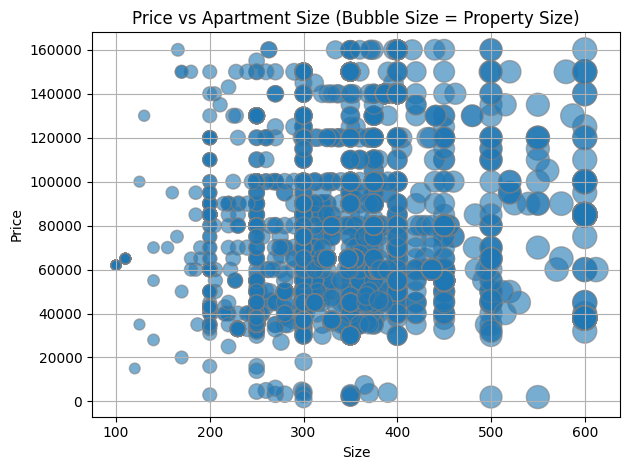

In [20]:

scatter = plt.scatter(
    df['size'], 
    df['price'], 
    s=df['size'] * 0.5,  # scale size for better visibility
    alpha=0.6, 
    edgecolors='gray'
)

plt.title("Price vs Apartment Size (Bubble Size = Property Size)")
plt.xlabel("Size")
plt.ylabel("Price")

plt.grid(True)
plt.tight_layout()
plt.show()

<h1>EDA<h1/>

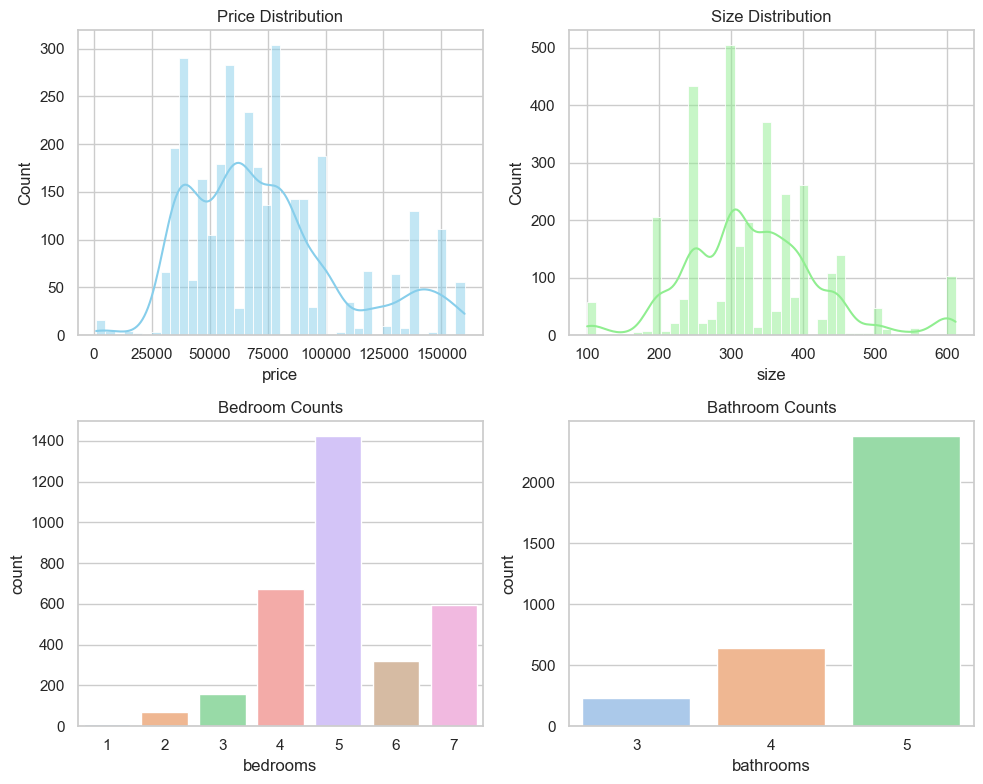

In [21]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df['price'], bins=40, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution')

sns.histplot(df['size'], bins=40, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Size Distribution')

sns.countplot(x='bedrooms',hue='bedrooms' ,data=df, ax=axes[1, 0], palette='pastel',legend=False)
axes[1, 0].set_title('Bedroom Counts')

sns.countplot(x='bathrooms',hue='bathrooms' ,data=df, ax=axes[1, 1], palette='pastel',legend=False)
axes[1, 1].set_title('Bathroom Counts')

plt.tight_layout()
plt.show()

C:\Users\zad_o\AppData\Local\Temp\ipykernel_35192\323578460.py:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



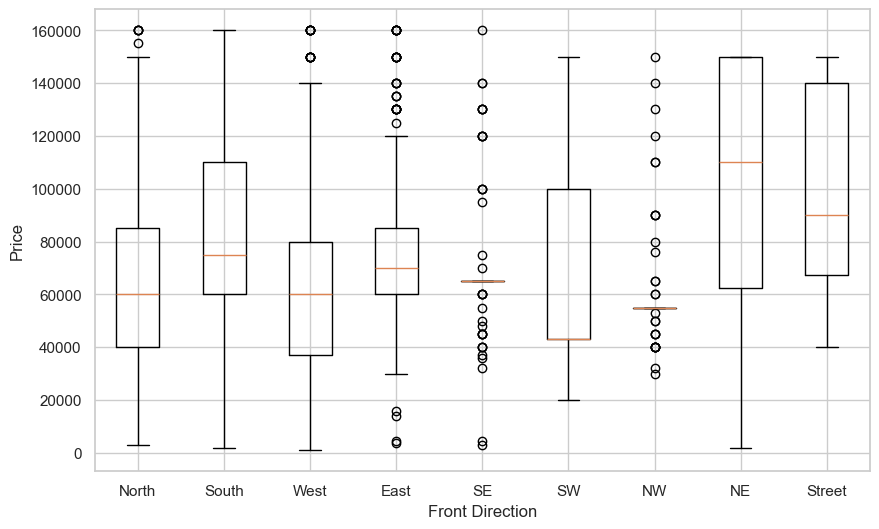

In [22]:
grouped_prices = [df[df['front'] == direction]['price'] for direction in df['front'].unique()]
labels = df['front'].unique()

plt.figure(figsize=(10, 6))
plt.boxplot(grouped_prices, labels=labels)

plt.xlabel("Front Direction")
plt.ylabel("Price")
plt.grid(True)
plt.show()

C:\Users\zad_o\AppData\Local\Temp\ipykernel_35192\3897543966.py:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



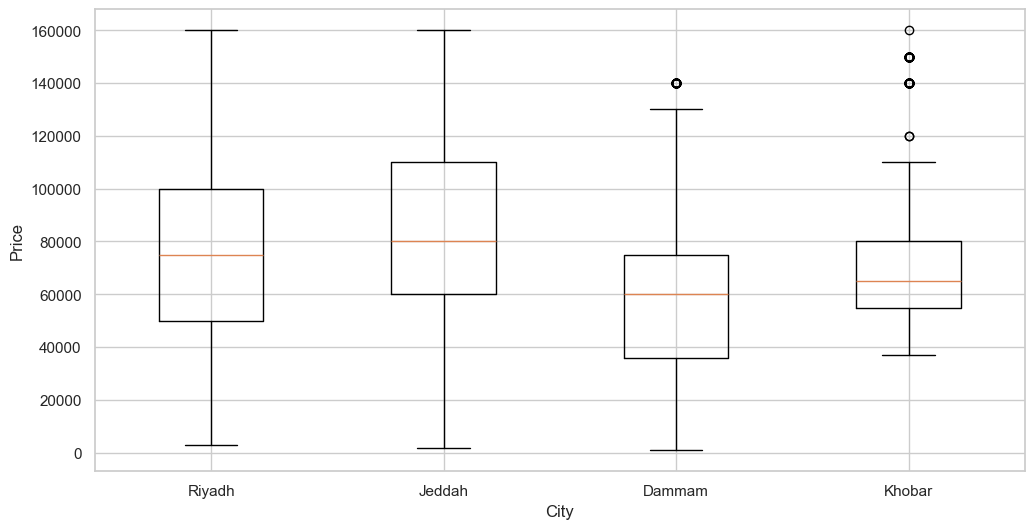

In [23]:
grouped_prices = [df[df['city'] == city]['price'] for city in df['city'].unique()]
labels = df['city'].unique()

plt.figure(figsize=(12, 6))
plt.boxplot(grouped_prices, labels=labels)

plt.xlabel("City")
plt.ylabel("Price")
plt.grid(True)

In [24]:
average_price = df.groupby('city')['price'].mean().reset_index().sort_values('price',ascending=False )
average_prices = average_price.rename(columns={'price': 'Average Price'})
print('The Averagr prices in each city higher to lower','\n',average_prices)

The Averagr prices in each city higher to lower 
      city  Average Price
1  Jeddah   87406.918195
3  Riyadh   76827.837545
2  Khobar   73082.606200
0  Dammam   61308.928571


<h1>Correlations</h1>

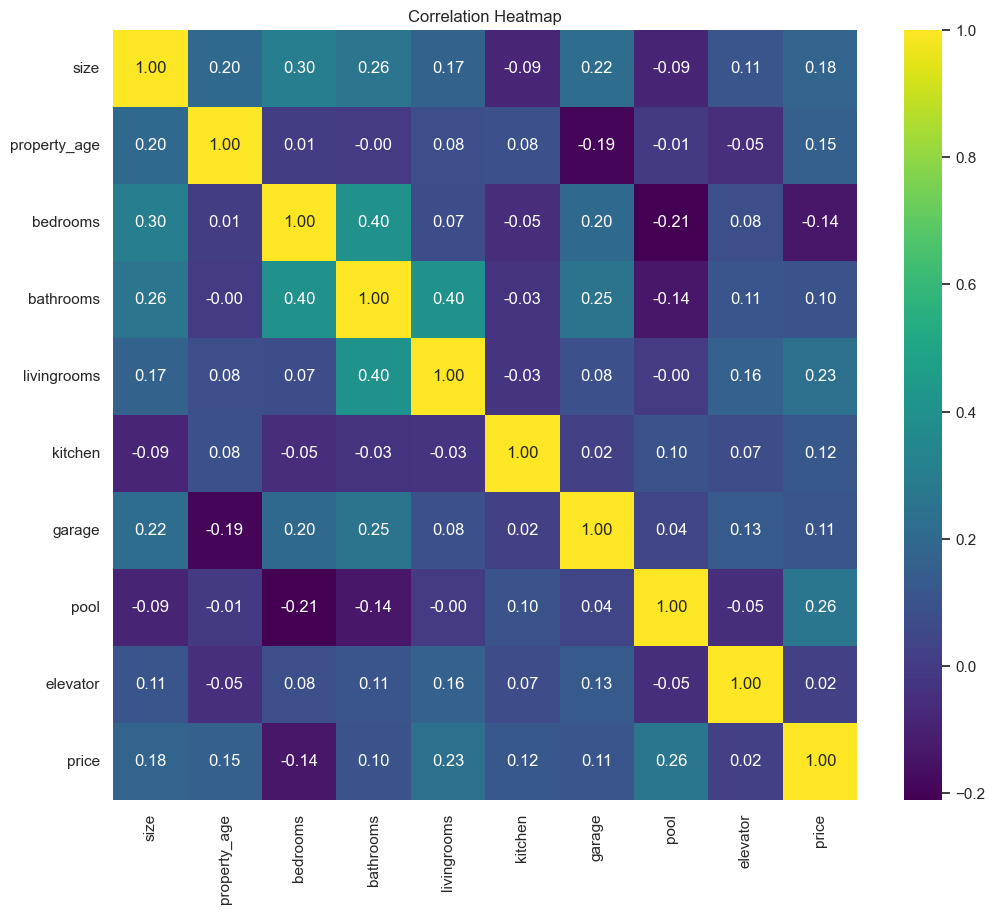

In [25]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')

plt.title("Correlation Heatmap")
plt.show()

<h1>predection<h1/>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import explained_variance_score

In [27]:
# One-hot encode for categorical variables
categorical_cols = ['city', 'district', 'front']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [28]:
# STrain-Test Split
X = df_encoded.drop(columns='price')
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
# Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

RMSE: 15132.67
R² Score: 0.810


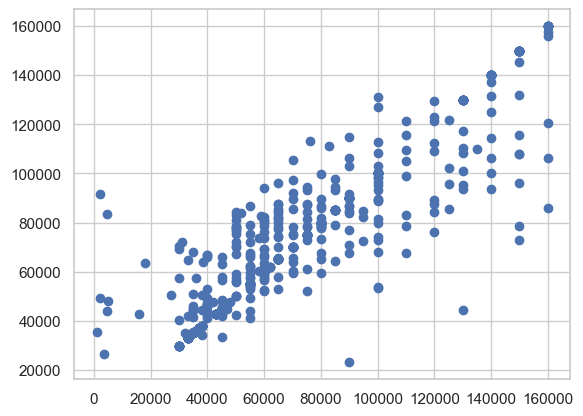

In [31]:
# Scatter plot of predictions vs test data
predictions = model.predict(X_test)
plt.scatter(y_test,predictions,color='b')

<h1>Conclusion<h1/>


<p>

This analysis explored key factors influencing real estate prices using data from Saudi Arabia. After cleaning and removing outliers, we conducted exploratory analysis and trained a machine learning model (Random Forest Regressor) that achieved an R² score of 0.859, indicating strong predictive performance.

*   City and district significantly affect property prices
*   The model can reliably estimate property prices based on location, size, and other features

<p/>
